In [16]:
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import joblib
import pandas as pd
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  )

In [18]:
training_set = train_datagen.flow_from_directory('/home/student/Downloads/SEMINAR/LC25000/lung_colon_image_set/colon_image_sets',
                                                 target_size = (128, 128),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                shuffle = False)

Found 10000 images belonging to 2 classes.


In [19]:
# test_datagen = ImageDataGenerator(rescale = 1./255)
# test_set = test_datagen.flow_from_directory('/home/student/Downloads/SEMINAR_TRIAL/COLON/TEST',
#                                             target_size = (128, 128),
#                                             batch_size = 64,
#                                             class_mode = 'binary',
#                                            shuffle = False)

In [20]:
# Download VGG16 weights (if not already downloaded)
weights_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
if not os.path.exists(weights_path):
    base_model = VGG16(weights='imagenet', include_top=False)
    base_model.save_weights(weights_path)

In [21]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# # Build a simplified VGG16-like model
# def build_vgg16_model(input_shape):
#     model = models.Sequential()

#     # Block 1
#     model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
#     model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
#     model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

#     # Block 2
#     model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
#     model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
#     model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

#     # Block 3
#     model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

#     # Flatten and fully connected layers
#     model.add(layers.Flatten())
#     model.add(layers.Dense(4096, activation='relu'))
#     model.add(layers.Dense(4096, activation='relu'))
#     model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification, so use sigmoid activation

#     return model

# # Specify input shape
# input_shape = (128, 128, 3)

# # Build the model
# vgg16_model = build_vgg16_model(input_shape)

# # Compile the model
# #vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Display the model summary
# vgg16_model.summary()

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build a simplified VGG16-like model
def build_vgg16_model(input_shape):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))


    #Block 4
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    
    #Block 5
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    
    # Flatten and fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification, so use sigmoid activation

    return model

# Specify input shape
input_shape = (128, 128, 3)

# Build the model
vgg16_model = build_vgg16_model(input_shape)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Example learning rate, you can adjust as needed
loss = 'binary_crossentropy'
metrics = ['accuracy']
vgg16_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Display the model summary
vgg16_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 32, 32, 128)       0         
 g2D)                                                 

In [37]:
import numpy as np

def extract_features(model, data_generator):
    # Remove the last dense layer (output layer)
    model.pop()

    # Freeze the weights of the remaining layers
    for layer in model.layers:
        layer.trainable = False
    
    # Extract features for each image in the data generator
    features_list = []
    total_images = len(data_generator.filenames)
    
    # Calculate the number of batches needed
    num_batches = total_images // data_generator.batch_size
    remaining_samples = total_images % data_generator.batch_size
    
    # Extract features for full batches
    for i in range(num_batches):
        images, _ = next(data_generator)
        batch_features = model.predict(images)
        features_list.append(batch_features)
    
    # Extract features for the remaining samples
    if remaining_samples > 0:
        images, _ = next(data_generator)
        batch_features = model.predict(images[:remaining_samples])
        features_list.append(batch_features)

    # Concatenate features from all batches
    return np.concatenate(features_list, axis=0)

# Example usage
# Assuming vgg16_model is your VGG16 model and training_set is your data generator
weights_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg16_model.load_weights(weights_path, by_name=True)  # Load weights only once
colon_features = extract_features(vgg16_model, training_set)

# Now, you can proceed with flattening and applying logistic regression
flat_features = colon_features.reshape((colon_features.shape[0], -1))


1/1 [==============================] - 0s 331ms/step


In [9]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report
# import joblib

# def train_and_evaluate_logistic_regression(features, labels, test_size=0.3, random_state=42, regularization_strength=1.0):
#     # Split the data into training and testing sets with a fixed random seed
    
    
#     X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)

#     # Standardize features
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     # Initialize logistic regression model with regularization
#     logreg_model = LogisticRegression(max_iter=1000, warm_start=True, C=regularization_strength,random_state=42)


#     # Lists to store training and test accuracy at each iteration
#     training_accuracy = []
#     test_accuracy = []

#     # Train logistic regression model and record accuracy at each iteration
#     for i in range(1, 101):  # Train for 100 iterations
#         logreg_model.fit(X_train_scaled, y_train)
        
#         # Training accuracy
#         y_train_pred = logreg_model.predict(X_train_scaled)
#         training_accuracy.append(accuracy_score(y_train, y_train_pred))
        
#         # Test accuracy
#         y_test_pred = logreg_model.predict(X_test_scaled)
#         test_accuracy.append(accuracy_score(y_test, y_test_pred))

#     # Evaluate the final model on the test set
#     y_pred = logreg_model.predict(X_test_scaled)
#     final_test_accuracy = accuracy_score(y_test, y_pred)
#     print(f"Final Test Accuracy: {final_test_accuracy * 100:.2f}%")

#     # Classification report
#     print("Classification Report:")
#     report = classification_report(y_test, y_pred, target_names=['No Colon Cancer', 'Colon Cancer'])
#     print(report)

#     # Save the scaler and the trained logistic regression model
#     joblib.dump(scaler, 'scaler.pkl')
#     joblib.dump(logreg_model, 'logreg_model.pkl')

#     # Plot training accuracy
#     plt.plot(range(1, 101), training_accuracy, label='Training Accuracy')
    
#     # Plot test accuracy
#     plt.plot(range(1, 101), test_accuracy, label='Test Accuracy')
    
#     plt.xlabel('Iteration')
#     plt.ylabel('Accuracy')
#     plt.title('Training and Test Accuracy over Iterations')
#     plt.legend()
#     plt.show()

#     # Return the trained logistic regression model and the scaler
#     return logreg_model, scaler

# # Example usage with regularization strength of 0.1
# logreg2_model, trained_scaler = train_and_evaluate_logistic_regression(flat_features, training_set.labels, random_state=42, regularization_strength=0.1)


/home/student/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Updated CSV file with predicted labels saved as: /home/student/Downloads/SEMINAR/LC25000/seminarnew_colon_predictions.csv
Final Test Accuracy: 85.83%
Classification Report:
                 precision    recall  f1-score   support

No Colon Cancer       0.87      0.85      0.86      1537
   Colon Cancer       0.85      0.86      0.86      1463

       accuracy                           0.86      3000
      macro avg       0.86      0.86      0.86      3000
   weighted avg       0.86      0.86      0.86      3000



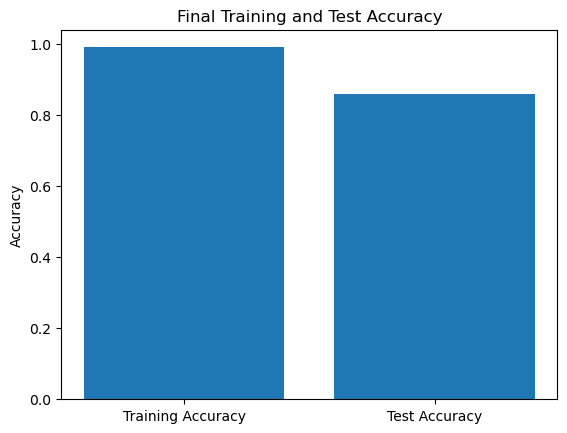

In [38]:
def train_and_evaluate_logistic_regression(features, labels, test_size=0.3, random_state=42, regularization_strength=0.1, epochs=200):
    # Split the data into training and testing sets with a fixed random seed
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize logistic regression model with regularization
    logreg_model = LogisticRegression(max_iter=epochs, warm_start=True, C=regularization_strength, random_state=random_state)

    # Lists to store training and test accuracy at each epoch
    training_accuracy = []
    test_accuracy = []

    # Train logistic regression model and record accuracy at each epoch
    for epoch in range(1, epochs + 1):
        logreg_model.fit(X_train_scaled, y_train)
        
        # Training accuracy
        y_train_pred = logreg_model.predict(X_train_scaled)
        training_accuracy.append(accuracy_score(y_train, y_train_pred))
        
        # Test accuracy
        y_test_pred = logreg_model.predict(X_test_scaled)
        test_accuracy.append(accuracy_score(y_test, y_test_pred))

    # Predict labels for the entire dataset
    all_features_scaled = scaler.transform(features)
    all_predicted_labels = logreg_model.predict(all_features_scaled)

    # Add predicted labels to the original CSV file
    original_csv = pd.read_csv('/home/student/Downloads/SEMINAR/LC25000/seminar_colon.csv')
    original_csv['Predicted_Labels'] = all_predicted_labels

    # Save the updated CSV file with predicted labels
    updated_csv_filename = '/home/student/Downloads/SEMINAR/LC25000/seminarnew_colon_predictions.csv'
    original_csv.to_csv(updated_csv_filename, index=False)
    print(f"Updated CSV file with predicted labels saved as: {updated_csv_filename}")

    # Evaluate the final model on the test set
    y_pred = logreg_model.predict(X_test_scaled)
    final_test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Final Test Accuracy: {final_test_accuracy * 100:.2f}%")

    # Classification report
    print("Classification Report:")
    report = classification_report(y_test, y_pred, target_names=['No Colon Cancer', 'Colon Cancer'])
    print(report)

    # Save the scaler and the trained logistic regression model
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(logreg_model, 'logreg_model.pkl')

    # Plot bar graph for final training and test accuracy
    plt.bar(['Training Accuracy', 'Test Accuracy'], [training_accuracy[-1], final_test_accuracy])
    plt.ylabel('Accuracy')
    plt.title('Final Training and Test Accuracy')
    plt.show()

    # Return the trained logistic regression model and the scaler
    return logreg_model, scaler


logreg2_model, trained_scaler = train_and_evaluate_logistic_regression(flat_features, training_set.labels, random_state=42, regularization_strength=0.1, epochs=200)


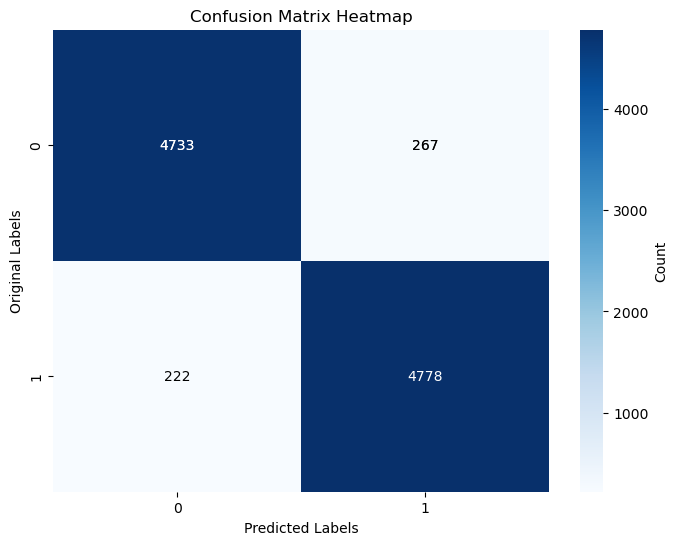

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Load the CSV file into a DataFrame
df = pd.read_csv('/home/student/Downloads/SEMINAR/LC25000/seminarnew_colon_predictions.csv')  # Replace 'your_file.csv' with the actual file path

# Assuming your CSV columns are named 'true_labels' and 'predicted_labels'
true_labels = df['label']
predicted_labels = df['Predicted_Labels']

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

fig, ax = plt.subplots(figsize=(8, 6))

# Create a custom heatmap
sns.heatmap(np.array(cm),
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=[0, 1],
            yticklabels=[0, 1],
            cbar_kws={'label': 'Count'})

# Add values to each cell manually
for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i==j:#(i,j) in [(0,0),(1,1),(2,2)]:
            textColor='White'
        else:
            textColor='Black'
        ax.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color=textColor, fontsize=10)

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('Original Labels')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()

Updated CSV file with predicted labels saved as: /home/student/Downloads/SEMINAR/LC25000/seminar_colon_predictions_rf.csv
Final Test Accuracy: 82.73%
Classification Report:
                 precision    recall  f1-score   support

No Colon Cancer       0.93      0.72      0.81      1537
   Colon Cancer       0.76      0.94      0.84      1463

       accuracy                           0.83      3000
      macro avg       0.85      0.83      0.83      3000
   weighted avg       0.85      0.83      0.83      3000



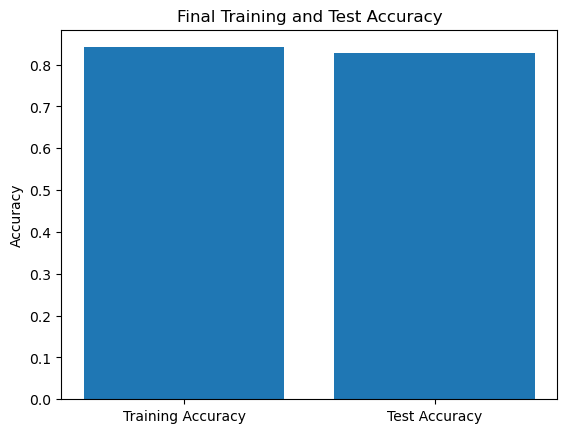

In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import pandas as pd

def train_and_evaluate_random_forest(features, labels, test_size=0.3, random_state=42, n_estimators=200, max_depth=2):
    # Split the data into training and testing sets with a fixed random seed
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)

    # Initialize Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

    # Lists to store training and test accuracy at each iteration
    training_accuracy = []
    test_accuracy = []

    # Train Random Forest model and record accuracy at each iteration
    for i in range(1, 201):  # Train for 100 iterations
        rf_model.fit(X_train, y_train)
        
        # Training accuracy
        y_train_pred = rf_model.predict(X_train)
        training_accuracy.append(accuracy_score(y_train, y_train_pred))
        
        # Test accuracy
        y_test_pred = rf_model.predict(X_test)
        test_accuracy.append(accuracy_score(y_test, y_test_pred))

    # Predict labels for the entire dataset
    all_predicted_labels = rf_model.predict(features)

    # Add predicted labels to the original CSV file
    original_csv = pd.read_csv('/home/student/Downloads/SEMINAR/LC25000/seminar_colon.csv')
    original_csv['Predicted_Labels_rf'] = all_predicted_labels

    # Save the updated CSV file with predicted labels
    updated_csv_filename = '/home/student/Downloads/SEMINAR/LC25000/seminar_colon_predictions_rf.csv'
    original_csv.to_csv(updated_csv_filename, index=False)
    print(f"Updated CSV file with predicted labels saved as: {updated_csv_filename}")

    # Evaluate the final model on the test set
    y_pred = rf_model.predict(X_test)
    final_test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Final Test Accuracy: {final_test_accuracy * 100:.2f}%")

    # Classification report
    print("Classification Report:")
    report = classification_report(y_test, y_pred, target_names=['No Colon Cancer', 'Colon Cancer'])
    print(report)

    # Save the trained Random Forest model
    joblib.dump(rf_model, 'rf_model.pkl')

    # Plot bar graph for final training and test accuracy
    plt.bar(['Training Accuracy', 'Test Accuracy'], [training_accuracy[-1], final_test_accuracy])
    plt.ylabel('Accuracy')
    plt.title('Final Training and Test Accuracy')
    plt.show()

    # Return the trained Random Forest model
    return rf_model

# Example usage with n_estimators=100 and max_depth=None
rf_model = train_and_evaluate_random_forest(flat_features, training_set.labels, random_state=42, n_estimators=200, max_depth=2)


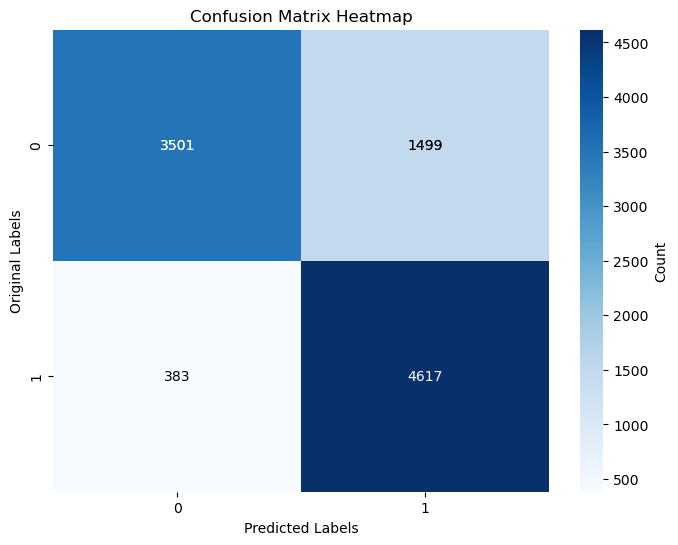

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Load the CSV file into a DataFrame
df = pd.read_csv('/home/student/Downloads/SEMINAR/LC25000/seminar_colon_predictions.csv')  # Replace 'your_file.csv' with the actual file path

# Assuming your CSV columns are named 'true_labels' and 'predicted_labels'
true_labels = df['label']
predicted_labels = df['Predicted_Labels_rf']

# Create a confusion matrix
c_m = confusion_matrix(true_labels, predicted_labels)

fig, ax = plt.subplots(figsize=(8, 6))

# Create a custom heatmap
sns.heatmap(np.array(c_m),
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=[0, 1],
            yticklabels=[0, 1],
            cbar_kws={'label': 'Count'})

# Add values to each cell manually
for i in range(len(c_m)):
    for j in range(len(c_m[i])):
        if i==j:#(i,j) in [(0,0),(1,1),(2,2)]:
            textColor='White'
        else:
            textColor='Black'
        ax.text(j + 0.5, i + 0.5, c_m[i, j], ha='center', va='center', color=textColor, fontsize=10)

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('Original Labels')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib
import pandas as pd

def train_and_evaluate_svm(features, labels, test_size=0.3, random_state=42, C=1.0, kernel='linear'):
    # Split the data into training and testing sets with a fixed random seed
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize SVM model
    svm_model = SVC(C=C, kernel=kernel, random_state=random_state)

    # Lists to store training and test accuracy at each iteration
    training_accuracy = []
    test_accuracy = []

    # Train SVM model and record accuracy at each iteration
    for i in range(1, 101):  # Train for 100 iterations
        svm_model.fit(X_train_scaled, y_train)
        
        # Training accuracy
        y_train_pred = svm_model.predict(X_train_scaled)
        training_accuracy.append(accuracy_score(y_train, y_train_pred))
        
        # Test accuracy
        y_test_pred = svm_model.predict(X_test_scaled)
        test_accuracy.append(accuracy_score(y_test, y_test_pred))

    # Predict labels for the entire dataset
    all_features_scaled = scaler.transform(features)
    all_predicted_labels = svm_model.predict(all_features_scaled)

    # Add predicted labels to the original CSV file
    original_csv = pd.read_csv('/home/student/Downloads/SEMINAR/LC25000/seminar_colon.csv')
    original_csv['Predicted_Labels'] = all_predicted_labels

    # Save the updated CSV file with predicted labels
    updated_csv_filename = '/home/student/Downloads/SEMINAR/LC25000/seminar_colon_predictions_svm.csv'
    original_csv.to_csv(updated_csv_filename, index=False)
    print(f"Updated CSV file with predicted labels saved as: {updated_csv_filename}")

    # Evaluate the final model on the test set
    y_pred = svm_model.predict(X_test_scaled)
    final_test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Final Test Accuracy: {final_test_accuracy * 100:.2f}%")

    # Classification report
    print("Classification Report:")
    report = classification_report(y_test, y_pred, target_names=['No Colon Cancer', 'Colon Cancer'])
    print(report)

    # Save the scaler and the trained SVM model
    joblib.dump(scaler, 'svm_scaler.pkl')
    joblib.dump(svm_model, 'svm_model.pkl')

    # Plot bar graph for final training and test accuracy
    plt.bar(['Training Accuracy', 'Test Accuracy'], [training_accuracy[-1], final_test_accuracy])
    plt.ylabel('Accuracy')
    plt.title('Final Training and Test Accuracy')
    plt.show()

    # Return the trained SVM model and the scaler
    return svm_model, scaler

# Example usage with C=1.0 and kernel='rbf'
svm_model, trained_scaler = train_and_evaluate_svm(flat_features, training_set.labels, random_state=42, C=1.0, kernel='linear')


In [17]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 8.3 MB/s eta 0:00:000m eta 0:00:010:00:01


Updated CSV file with predicted labels saved as: /home/student/Downloads/SEMINAR/LC25000/seminar_colon_predictions_xgboost.csv
Final Test Accuracy: 81.47%
Classification Report:
                 precision    recall  f1-score   support

No Colon Cancer       0.91      0.70      0.80      1537
   Colon Cancer       0.75      0.93      0.83      1463

       accuracy                           0.81      3000
      macro avg       0.83      0.82      0.81      3000
   weighted avg       0.83      0.81      0.81      3000



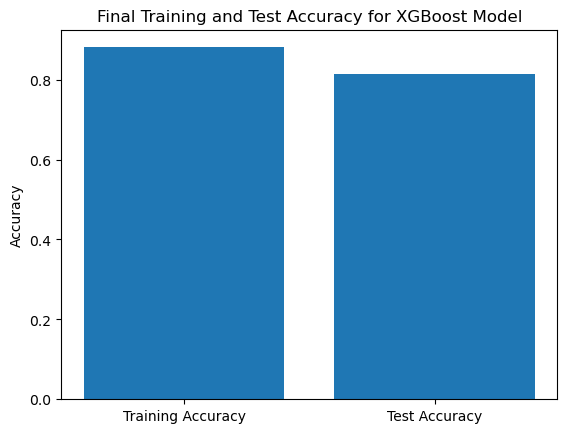

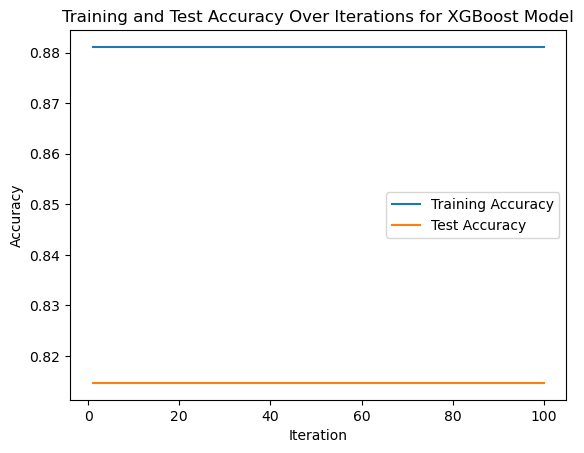

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import pandas as pd

def train_and_evaluate_xgboost(features, labels, test_size=0.3, random_state=42, learning_rate=0.001, n_estimators=100):
    # Split the data into training and testing sets with a fixed random seed
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize XGBoost model
    xgb_model = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, random_state=42)

    # Lists to store training and test accuracy at each iteration
    training_accuracy = []
    test_accuracy = []

    # Train XGBoost model and record accuracy at each iteration
    for i in range(1, 101):  # Train for 100 iterations
        xgb_model.fit(X_train_scaled, y_train)

        # Training accuracy
        y_train_pred = xgb_model.predict(X_train_scaled)
        training_accuracy.append(accuracy_score(y_train, y_train_pred))

        # Test accuracy
        y_test_pred = xgb_model.predict(X_test_scaled)
        test_accuracy.append(accuracy_score(y_test, y_test_pred))

    # Predict labels for the entire dataset
    all_features_scaled = scaler.transform(features)
    all_predicted_labels = xgb_model.predict(all_features_scaled)

    # Add predicted labels to the original CSV file
    original_csv = pd.read_csv('/home/student/Downloads/SEMINAR/LC25000/seminar_colon.csv')
    original_csv['Predicted_Labels'] = all_predicted_labels

    # Save the updated CSV file with predicted labels
    updated_csv_filename = '/home/student/Downloads/SEMINAR/LC25000/seminar_colon_predictions_xgboost.csv'
    original_csv.to_csv(updated_csv_filename, index=False)
    print(f"Updated CSV file with predicted labels saved as: {updated_csv_filename}")

    # Evaluate the final model on the test set
    y_pred = xgb_model.predict(X_test_scaled)
    final_test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Final Test Accuracy: {final_test_accuracy * 100:.2f}%")

    # Classification report
    print("Classification Report:")
    report = classification_report(y_test, y_pred, target_names=['No Colon Cancer', 'Colon Cancer'])
    print(report)

    # Save the scaler and the trained XGBoost model
    joblib.dump(scaler, 'xgboost_scaler.pkl')
    joblib.dump(xgb_model, 'xgboost_model.pkl')

    # Plot bar graph for final training and test accuracy
    plt.bar(['Training Accuracy', 'Test Accuracy'], [training_accuracy[-1], final_test_accuracy])
    plt.ylabel('Accuracy')
    plt.title('Final Training and Test Accuracy for XGBoost Model')
    plt.show()

    # Plot line graph for training and test accuracy over iterations
    plt.plot(range(1, 101), training_accuracy, label='Training Accuracy')
    plt.plot(range(1, 101), test_accuracy, label='Test Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy Over Iterations for XGBoost Model')
    plt.legend()
    plt.show()

    # Return the trained XGBoost model and the scaler
    return xgb_model, scaler

# Example usage with XGBoost parameters
xgb_model, trained_scaler = train_and_evaluate_xgboost(flat_features, training_set.labels, random_state=42, learning_rate=0.001, n_estimators=100)


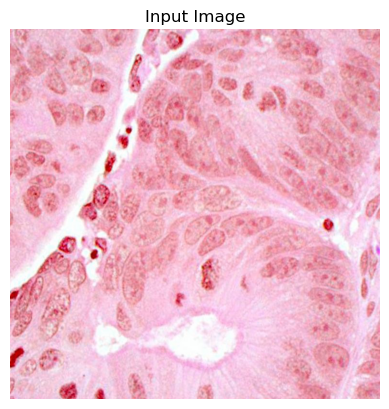

1/1 [==============================] - 0s 76ms/step
The image is predicted as 'No Colon Cancer'.


In [18]:
# Assuming you have defined and trained the logistic regression model and scaler
# Load the logistic regression model and scaler
# You need to define and train logreg2_model and scaler

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess the input image
input_image_path = '/home/student/Downloads/SEMINAR/LC25000/lung_colon_image_set/colon_image_sets/colon_aca_rgb/colonca758.jpeg'
img = image.load_img(input_image_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

plt.imshow(Image.open(input_image_path))
plt.title('Input Image')
plt.axis('off')
plt.show()

# Extract features from the preprocessed image using the VGG16 model
input_image_features = vgg16_model.predict(img_array)

# Standardize the extracted features using the same scaler
input_image_features_scaled = trained_scaler.transform(input_image_features.reshape(1, -1))

# Use the logistic regression model to predict whether the image represents colon cancer or not
prediction = logreg2_model.predict(input_image_features_scaled)

# Print the prediction
if prediction == 1:
    print("The image is predicted as 'No Colon Cancer'.")
else:
    print("The image is predicted as 'Colon Cancer'.")